In [1]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
# tests that we have all the data
assert X_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [5]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_train = X_train.astype('float32') / 255.0

In [6]:
y_train = to_categorical(y_train)

In [7]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

optimizer = SGD(learning_rate=0.01, momentum=0.9)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [8]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.2294 - accuracy: 0.9296
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0720 - accuracy: 0.9783
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0465 - accuracy: 0.9857
Epoch 4/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0346 - accuracy: 0.9890
Epoch 5/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0249 - accuracy: 0.9923
Epoch 6/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0195 - accuracy: 0.9937
Epoch 7/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0131 - accuracy: 0.9961
Epoch 8/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0103 - accuracy: 0.9971
Epoch 9/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0075 - accuracy: 0.9980
Epoch 10/10
1875/1875 [==============================] - 36s 19m

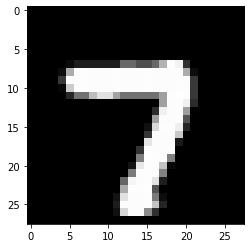

In [10]:
image = random.choice(x_test)

plt.imshow(image, cmap=plt.get_cmap('gray'))
plt.show()

In [11]:
image = (image.reshape((1, 28, 28, 1))).astype('float32') / 255.0

In [12]:
digit = np.argmax(model.predict(image)[0], axis=-1)

In [13]:
print("prediction:", digit)

prediction: 7
